In [2]:
import os
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

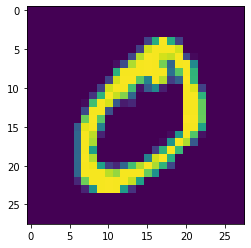

In [3]:
# 定义transform对象，其定义了数据集中的图片应该做怎样的处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

# 加载数据集
train_dataset = datasets.MNIST(root='./',
                train=True,
                transform=transform,
                download=False)

test_dataset = datasets.MNIST(root='./',
               train=False,
               transform=transform,
               download=False)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

train_images = train_loader.dataset.data
plt.imshow(train_images[1])

In [44]:
class NeuralNetwork(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        """
        定义第一个线性层，
        输入为图片（28x28），
        输出为第一个隐层的输入，大小为128。
        """
        self.hidden1 = nn.Linear(28*28, 128)
        self.act1 = nn.Tanh()

        self.hidden2 = nn.Linear(128, 64)
        self.act2 = nn.ReLU()

        self.hidden3 = nn.Linear(64, 10)
        self.softmax = nn.LogSoftmax(dim=1)

        # self.model = nn.Sequential(nn.Linear(28*28, 128),
        #                 nn.Tanh(),
        #                 nn.Linear(128, 64),
        #                 nn.ReLU(),
        #                 nn.Linear(64, 10),
        #                 nn.LogSoftmax(dim=1))

    def forward(self, x):
        # x = torch.flatten(x, 1)
        # x = F.tanh(self.hidden1(x))
        # x = F.relu(self.hidden2(x))
        # x = F.log_softmax(self.hidden3(x))
        x = x.view(x.shape[0], -1)
        x = self.hidden1(x)
        x = self.act1(x)
        x = self.hidden2(x)
        x = self.act2(x)
        x = self.hidden3(x)
        x = self.softmax(x)
        return x


Epoch 0 - Training loss: 0.6620361502887979
Epoch 1 - Training loss: 0.2671668966060508
Epoch 2 - Training loss: 0.20629838134434178
Epoch 3 - Training loss: 0.1708237739808079
Epoch 4 - Training loss: 0.14412233281010853
Epoch 5 - Training loss: 0.1252361095395249
Epoch 6 - Training loss: 0.11064415370453713
Epoch 7 - Training loss: 0.09729048614797275
Epoch 8 - Training loss: 0.08650448356868266
Epoch 9 - Training loss: 0.07848016982987475
Epoch 10 - Training loss: 0.0722299876294212
Epoch 11 - Training loss: 0.06528749131162696
Epoch 12 - Training loss: 0.0597170632444759
Epoch 13 - Training loss: 0.05510185053720991
Epoch 14 - Training loss: 0.050467493308922536


In [45]:
net = NeuralNetwork()
# print(net)
# params = list(net.parameters())
# print(params)

# 定义损失函数，CrossEntropyLoss最常用，如果换用其它损失函数，传入张量的相关属性（shape，dtype）需要相应改变
criterion = nn.CrossEntropyLoss()
# 定义优化器，这里使用随机梯度下降法，学习率设置为0.003，momentum取默认的0.9（用于防止过拟合）
optimizer = optim.SGD(net.parameters(), lr=0.003, momentum=0.9)

epochs = 15             # 一共训练15轮
for e in range(epochs):
    epoch_loss = 0      # 本轮的损失值
    for image, label in train_loader:
        output = net(image)                 # 前向传播获取预测值
        loss = criterion(output, label)     # 计算损失
        loss.backward()                     # 进行反向传播
        optimizer.step()                    # 更新权重
        optimizer.zero_grad()               # 清空梯度
        epoch_loss += loss.item()           # 累加损失
    else:
        # 一轮循环结束后打印本轮的损失函数
        print("Epoch {} - Training loss: {}".format(e, epoch_loss/len(train_loader)))

# 将训练结果保存到mnist.pth文件
PATH = './mnist.pth'
torch.save(net.state_dict(), PATH)

In [5]:
# 读取模型
PATH = './mnist.pth'
net = NeuralNetwork()
net.load_state_dict(torch.load(PATH))
# 评估模型效果
correct_count, all_count = 0, 0

# 从test_loader中一批一批加载图片
for images, labels in test_loader:
    for i in range(len(labels)):
        pred = net(images[i])       # 进行前向传播，获取预测值
        pred_list = list(pred.detach().numpy()[0])       # 将预测结果转为概率列表。[0]是取第一张照片的10个数字的概率列表（因为一次只预测一张照片）
        pred_label = pred_list.index(max(pred_list))      # 取最大的index作为预测结果
        true_label = labels.numpy()[i]
        if(true_label == pred_label):       # 如果预测标签和真实标签相等，则预测正确
            correct_count += 1
        all_count += 1

print('Number of Images tested: {}'.format(all_count))
print('Model Accuracy: {}'.format(correct_count/all_count))

NameError: name 'NeuralNetwork' is not defined